# Data Scientist Associate Practical Exam Submission

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fitness_class_2212.csv")

df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


## Task 1 

### Data Validation
The dataset contains 1500 rows and 8 columns with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

- booking_id: Same as description without missing values.
- months_as_member : Same as description without missing values.
- weight : 20 missing values, so I decided to replace the missing values with the overall average weight.
- days_before : No missing values and not same as description. Some values contains trailing characters "days", therefore I strip trailing characters of each value and change the datatype to integer.
- day_of_week : No missing values but consist values that not same as description, "Monday, Wednesday, Fri.", so I decided to replace those value to "Mon, Wed, Fri" respectively.
- time : Same as description without missing values.
- category : No missing values and not same as description, where I changed "-" values to "Unknown".
- attended : Same as description without missing values.

After the data validation, the dataset contains 1500 rows and 8 columns with no missing values.

## Original Dataset

In [3]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above
df.info()

# Count missing values in each column
print(" ")
print("Missing Values")
print(df.isna().sum())

# Check all values in each column
print(" ")
print("Unique Values of Columns")
print("days_before: ", df.days_before.unique().tolist())
print("day_of_week: ", df.day_of_week.unique().tolist())
print("time: ", df.time.unique().tolist())
print("category: ", df.category.unique().tolist())
print("attended: ", df.attended.unique().tolist())

# Check min & max value in each column
print(" ")
print("Minimum and Maximum Value of Columns")
print("Min & max months_as_member: ", df.months_as_member.min(), "&", df.months_as_member.max())
print("Min & max weight: ", df.weight.min(), "&", df.weight.max())
print("Min & max days_before: ", df.days_before.min(), "&", df.days_before.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
 
Missing Values
booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64
 
Unique Values of Columns
days_before:  ['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13', '12 days', '20', '1', '15', '6 days', '11

In [4]:
# weight : Replace missing values with the overall average weight.
mean_weight = df['weight'].mean().round(2)
df['weight'].fillna(value=mean_weight, inplace=True)

In [5]:
# days_before : Trim string 'days' from the value
df['days_before'] = df['days_before'].map(lambda x: x.rstrip('days')).str.strip()
df['days_before'] = df['days_before'].astype('int64')

In [6]:
# day_of_week
df['day_of_week'] = df['day_of_week'].map(lambda x: x.rstrip('.'))
df['day_of_week'].loc[df['day_of_week'] == 'Wednesday'] = 'Wed'
df['day_of_week'].loc[df['day_of_week'] == 'Monday'] = 'Mon'

In [7]:
# category
df['category'].loc[df['category'] == '-'] = 'Unknown'

### After Data Cleaning

In [8]:
df.info()

# Count missing values in each column
print(" ")
print("Missing Values")
print(df.isna().sum())

# Check all values in each column
print(" ")
print("Unique Values of Columns")
print("days_before: ", df.days_before.unique().tolist())
print("day_of_week: ", df.day_of_week.unique().tolist())
print("time: ", df.time.unique().tolist())
print("category: ", df.category.unique().tolist())
print("attended: ", df.attended.unique().tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB
 
Missing Values
booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64
 
Unique Values of Columns
days_before:  [8, 2, 14, 10, 6, 4, 9, 12, 5, 3, 7, 13, 20, 1, 15, 11, 16, 17, 29]
day_of_week:  ['Wed', 'Mon', 'Sun', 'Fri', 'Th

## Task 2
### Inspecting how many bookings attended the class. 

The countplot below does not show the balance of observations across categories of the variable attended. We can see that the category with attended = 0 (did not attend the class) has more observations than attended=1 (attended the class). This means that more members did not attend the class than attended the class.

<AxesSubplot: xlabel='count', ylabel='attended'>

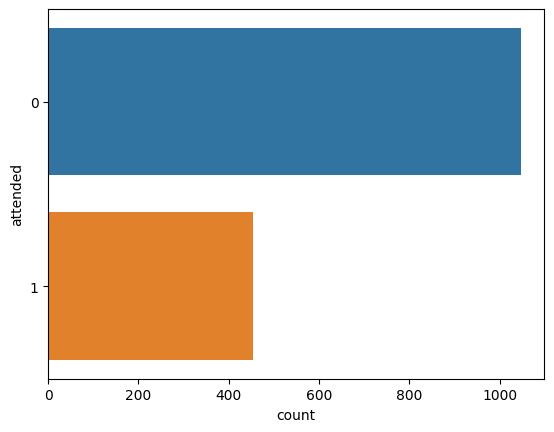

In [9]:
#sns.countplot(data=df, y="category", hue="attended")
sns.countplot(data=df, y="attended")

## Task 3
### The distribution of the number of months as a member

From the histogram, we can see that the distribution of months as a member is right-skewed, with a peak around 5-15 months and a long tail of members who have been members for many months (up to 148 months in this dataset). This suggests that the fitness club has a high turnover of members, with many new members joining each month and relatively few members remaining long-term.



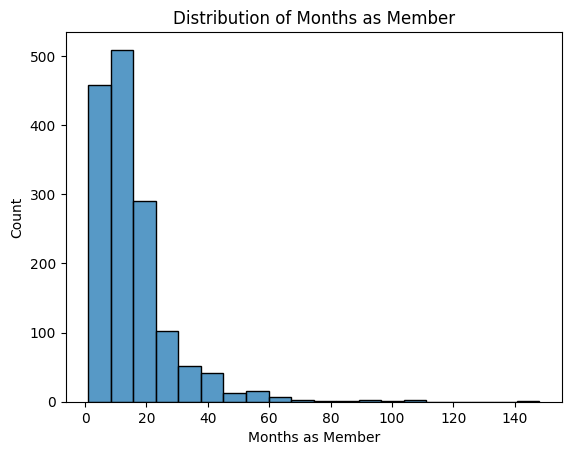

In [10]:
# Create a histogram of months as member
sns.histplot(x='months_as_member', data=df, bins=20)
plt.title('Distribution of Months as Member')
plt.xlabel('Months as Member')
plt.show()

## Task 4
### Inspecting the relationship between attendance and number of months as a member.

As we can see from the chart below, for member not attended the class (attended = 0), the dots are generally more clustered towards new members (months_as_member < 40 months ), indicating that members who have been part of the fitness club for a longer time tend to have a higher attendance rate. 

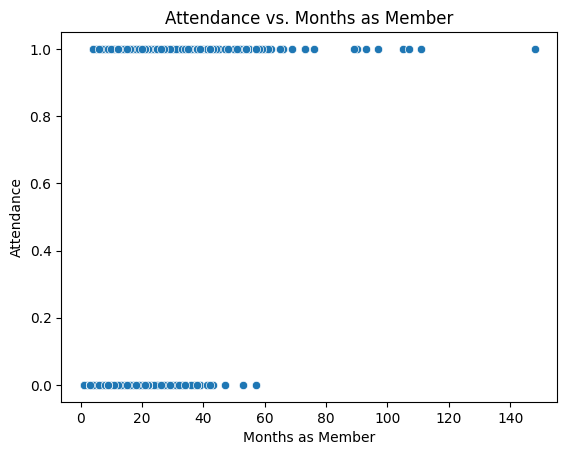

In [11]:
# Create a scatter plot of attendance vs. months as member
sns.scatterplot(data=df, x='months_as_member', y='attended')
plt.xlabel('Months as Member')
plt.ylabel('Attendance')
plt.title('Attendance vs. Months as Member')
plt.show()

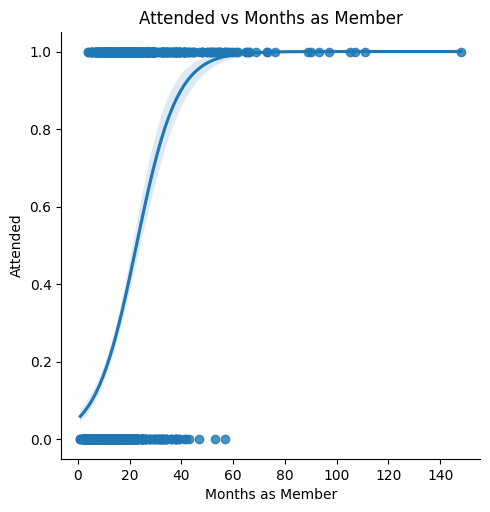

In [12]:
sns.lmplot(data=df, x='months_as_member', y='attended', logistic=True)
plt.xlabel('Months as Member')
plt.ylabel('Attended')
plt.title('Attended vs Months as Member')
plt.show()

In [13]:
df.nunique()

booking_id          1500
months_as_member      72
weight              1241
days_before           19
day_of_week            7
time                   2
category               6
attended               2
dtype: int64

In [14]:
## months_as_member
#print(df['months_as_member'].describe())
#print(len(df[df['months_as_member'] < 12]))

## Weight
#print(df['weight'].describe())
#print(len(df[df['weight'] > 82]))
#print(len(df[df['weight'] <= 82]))

## days_before
#print(df['weight'].describe())
#print(len(df[df['weight'] > 82]))
#print(len(df[df['weight'] <= 82]))


In [15]:
# Feature Engineering

#df['is_weight_above_avg'] = np.where((df['weight'] > 82), 1, 0)
#df['is_new_member'] = np.where((df['months_as_member'] < 12), 1, 0)


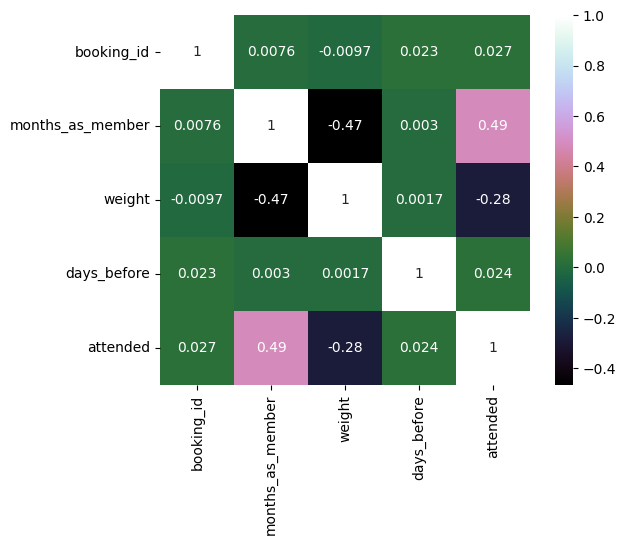

In [16]:
# Correlation
corr_matrix = df.corr()
sns.heatmap(corr_matrix,vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

## Task 5

The business wants to predict whether members will attend using the data provided. Since the outcome we are trying to predict is binary, whether a member will attend (1) or not (0), hence this is a (binary) classification problem.


## Task 6
### Baseline Model - Logistic Regression

Predicting whether a member will attend (1) or not (0) is a binary classification problem. Therefore we can use a simple Logistic Regression model as a baseline model.

In [17]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

features = df.drop(columns=['booking_id', 'attended'])
X = pd.get_dummies(features)
y = df['attended']

# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log =logreg.predict(X_test)


In [18]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy_logreg = accuracy_score(y_test, y_pred_log)
print("Accuracy Logistic Regression : ", accuracy_logreg)

Accuracy Logistic Regression :  0.7622222222222222


In [19]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy Random Forest Classifier : ", accuracy_rfc)

Accuracy Random Forest Classifier :  0.7422222222222222


## Task 7
### Comparison Model - Support Vector Machines

Support Vector Machines (SVM) is a supervised learning technique that offers very high accuracy compared to other classifiers such as logistic regression and decision trees. SVM is capable of performing binary and multi-class classification on a dataset and relatively simple.

In [20]:
# Support Vector Machines
from sklearn import svm

svm_lin = svm.SVC(kernel='linear')
svm_lin.fit(X_train,y_train)
y_pred_svm = svm_lin.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy Support Vector Machines : ", accuracy_svm)

Accuracy Support Vector Machines :  0.7622222222222222


## Task 8
I chose the Logistic Regression and the Support Vector Machines for the following reasons:

**Logistic Regression as baseline model :**
- It is a simple and easy-to-implement model.
- Best suited to solving classification problems where the dimensionality of the dataset is low.

**Support Vector Machines as comparison model :** 
- It is capable of performing binary and multi-class classification.
- Higher accuracy compared to other models.

## Task 9
###  Model Evaluation

The three main metrics used to evaluate a classification model are accuracy, precision, and recall therefore I chose to classification report to get the result of all those metrics. 


In [21]:
from sklearn.metrics import classification_report

# Evaluating Logistic Regression Model
print("Classification Report of Logistic Regression Model")
print(classification_report(y_test, y_pred_log))

# print newline separator
print("")

# Evaluating Support Vector Machines Model
print("Classification Report of Support Vector Machines Model")
print(classification_report(y_test, y_pred_svm ))

Classification Report of Logistic Regression Model
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       305
           1       0.73      0.41      0.53       145

    accuracy                           0.76       450
   macro avg       0.75      0.67      0.68       450
weighted avg       0.76      0.76      0.74       450


Classification Report of Support Vector Machines Model
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       305
           1       0.76      0.38      0.51       145

    accuracy                           0.76       450
   macro avg       0.76      0.66      0.68       450
weighted avg       0.76      0.76      0.73       450



## Task 10
### Result

As we can see on classification report, Logistic Regression and Support Vector Machines have same accuracy score 0.76. Precision of two models for both classes is relatively close , but we also see an enormous difference in terms of recall and F1 score for the two classes. This means the two models didn't really perform as well as initially thought.

Based on the difference in recall and F1 score for the two classes, I believe that the Logistic Regression model has a slightly better performance compared to the Support Vector Machine model.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam